In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorboard.backend.event_processing import event_accumulator

C:\Users\pc\Anaconda3\envs\dl\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pc\Anaconda3\envs\dl\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\pc\Anaconda3\envs\dl\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
if not os.path.exists("graphs"):
    os.makedirs("graphs")

In [3]:
FOLDS = ["log_0", "log_1", "log_2", "log_3", "log_4"]

TRAIN_METRIC_N_LOSS = ["acc", "f1", "precision", "recall", "loss"]
TEST_METRIC_N_LOSS  = ["val_acc", "val_f1", "val_precision", "val_recall", "val_loss"]

skip_N = 6

In [4]:
tbs = []
for fold in FOLDS:
    tbs.append(os.listdir(fold)[0])

In [5]:
for k, nth_fold in enumerate(FOLDS):
    train_logs = []
    test_logs  = []
    
    ea = event_accumulator.EventAccumulator(nth_fold+"/"+tbs[k],
                                            size_guidance={ # see below regarding this argument
                                                event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                                                event_accumulator.IMAGES: 4,
                                                event_accumulator.AUDIO: 4,
                                                event_accumulator.SCALARS: 0,
                                                event_accumulator.HISTOGRAMS: 1})

    ea.Reload()
    for i in range(len(TRAIN_METRIC_N_LOSS)):
        train_logs.append(pd.DataFrame(ea.Scalars(TRAIN_METRIC_N_LOSS[i])))
        test_logs.append(pd.DataFrame(ea.Scalars(TEST_METRIC_N_LOSS[i])))
    
    globals()[nth_fold] = [train_logs, test_logs]

In [6]:
for m in FOLDS:
    n_train_logs = []
    n_test_logs  = []
    
    for (train, test) in zip(globals()[m][0], globals()[m][1]):
        n_train = []
        n_test  = []

        for ix, i in enumerate(train['value'].tolist()):
            if ix%skip_N==0:
                n_train.append(i)

        for ix, i in enumerate(test['value'].tolist()):
            if ix%1==0:
                n_test.append(i)

        n_train_logs.append(n_train)
        n_test_logs.append(n_test)
    
    globals()["n_"+m] = [n_train_logs, n_test_logs]

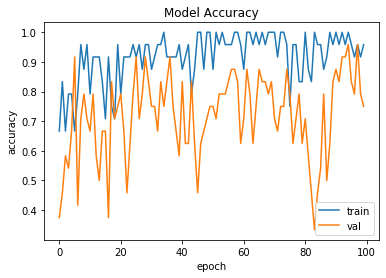

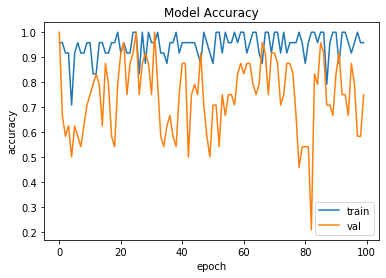

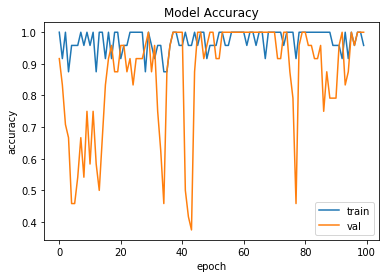

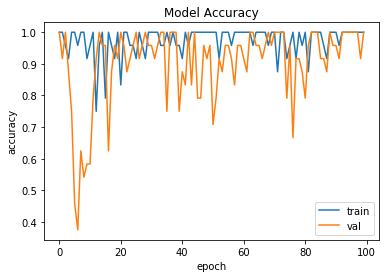

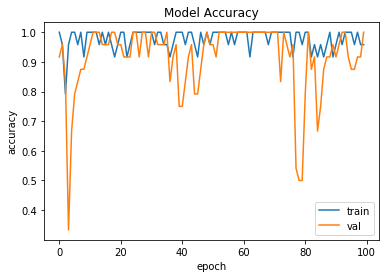

In [7]:
for ix, fold in enumerate(FOLDS):
    plt.plot(globals()["n_"+fold][0][0])
    plt.plot(globals()["n_"+fold][1][0])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.savefig("graphs/{}. FOLD - MODEL ACCURACY.jpg".format(ix+1), dpi=150)
    plt.show()

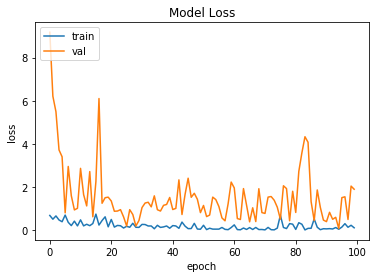

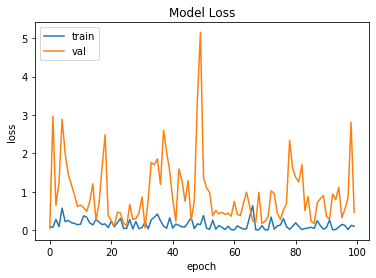

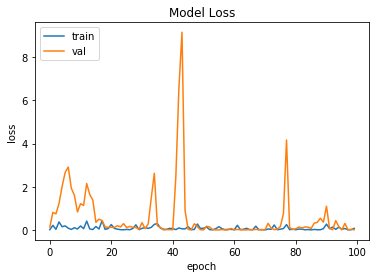

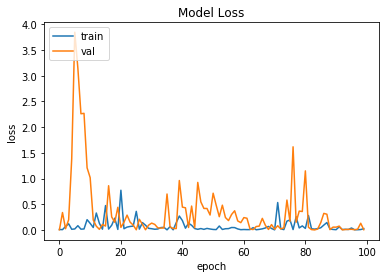

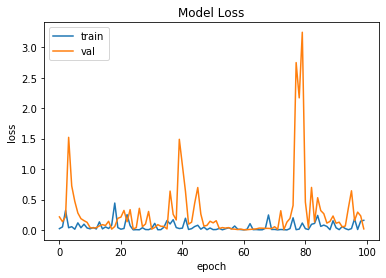

In [8]:
for ix, fold in enumerate(FOLDS):
    plt.plot(globals()["n_"+fold][0][4])
    plt.plot(globals()["n_"+fold][1][4])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig("graphs/{}. FOLD - MODEL LOSS.jpg".format(ix+1), dpi=150)
    plt.show()